In [14]:
import requests
from pandas.io.json import json_normalize
import pandas as pd
import matplotlib.pyplot as plt

url = "https://api.covid19api.com/country/singapore/status/confirmed?from=2019-12-01T00:00:00Z&to=2021-03-01T00:00:00Z"
df = pd.read_json(url)
df

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Singapore,SG,,,,1.35,103.82,0,confirmed,2020-01-22 00:00:00+00:00
1,Singapore,SG,,,,1.35,103.82,1,confirmed,2020-01-23 00:00:00+00:00
2,Singapore,SG,,,,1.35,103.82,3,confirmed,2020-01-24 00:00:00+00:00
3,Singapore,SG,,,,1.35,103.82,3,confirmed,2020-01-25 00:00:00+00:00
4,Singapore,SG,,,,1.35,103.82,4,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
400,Singapore,SG,,,,1.35,103.82,59900,confirmed,2021-02-25 00:00:00+00:00
401,Singapore,SG,,,,1.35,103.82,59913,confirmed,2021-02-26 00:00:00+00:00
402,Singapore,SG,,,,1.35,103.82,59925,confirmed,2021-02-27 00:00:00+00:00
403,Singapore,SG,,,,1.35,103.82,59936,confirmed,2021-02-28 00:00:00+00:00


In [15]:
df["Date"] = pd.to_datetime(df["Date"], format='%m/%d/%Y')
df["Date"]

0     2020-01-22 00:00:00+00:00
1     2020-01-23 00:00:00+00:00
2     2020-01-24 00:00:00+00:00
3     2020-01-25 00:00:00+00:00
4     2020-01-26 00:00:00+00:00
                 ...           
400   2021-02-25 00:00:00+00:00
401   2021-02-26 00:00:00+00:00
402   2021-02-27 00:00:00+00:00
403   2021-02-28 00:00:00+00:00
404   2021-03-01 00:00:00+00:00
Name: Date, Length: 405, dtype: datetime64[ns, UTC]

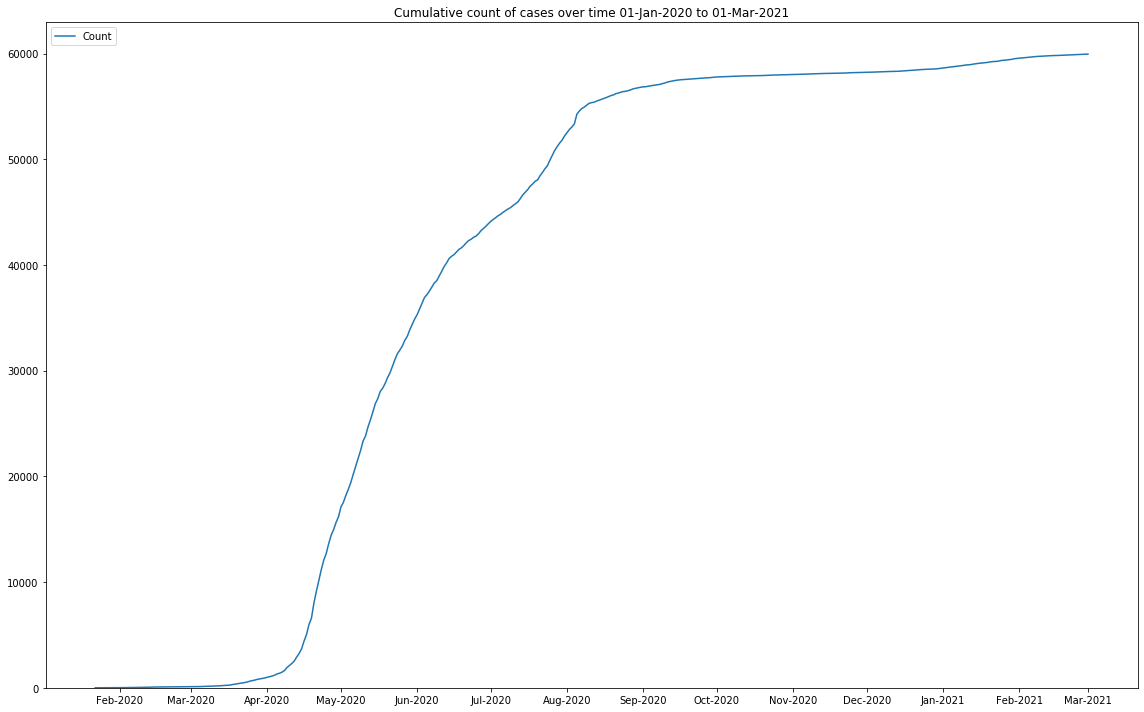

In [31]:
import matplotlib.dates as mdates

fig, (ax1) = plt.subplots(1, figsize = (16,10))
#fig.suptitle('Axes values are scaled individually by default')
ax1.plot(df['Date'],df["Cases"])
# ax2.plot(df2['START_DT'], df2['total_count'], label = 'total_count', color = 'g')
# ax3.plot(df2['START_DT'], df2['Peak/Total Perc'], label = 'Percentage', color = 'r')
years = mdates.YearLocator()  # every year
months = mdates.MonthLocator()  # every month
myFmt = mdates.DateFormatter('%b-%Y')
ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(myFmt)
# ax2.xaxis.set_major_locator(months)
# ax2.xaxis.set_major_formatter(myFmt)
# ax3.xaxis.set_major_locator(months)
# ax3.xaxis.set_major_formatter(myFmt)
ax1.set_ylim(ymin=0)

ax1.legend(["Count"],loc="upper left")
# ax2.legend()
# ax3.legend()
ax1.set_title('Cumulative count of cases over time 01-Jan-2020 to 01-Mar-2021')

#ax1.grid(True)
fig.tight_layout()